In [1]:
import logging

logging.basicConfig(
    level=logging.INFO,
    format="%(levelname)s:%(name)s:%(message)s"
)


In [ ]:
from climdata import ClimData
overrides = [
    "dataset=hyras",  # Choose the MSWX dataset for extraction
    "lat=52",
    "lon=13",
    f"time_range.start_date=2024-01-01",  # Start date for data extraction
    f"time_range.end_date=2024-12-31",    # End date for data extraction
    "variables=[tasmin,tasmax,pr,'tas']",       # Variables to extract: min/max temp and precipitation
    "data_dir=/beegfs/muduchuru/data",    # Local directory to store raw/intermediate files
]
extractor = ClimData(overrides=overrides)
ds = extractor.extract()

INFO:numexpr.utils:Note: detected 80 virtual cores but NumExpr set to maximum of 64, check "NUMEXPR_MAX_THREADS" environment variable.
INFO:numexpr.utils:Note: NumExpr detected 80 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 16.
INFO:numexpr.utils:NumExpr defaulting to 16 threads.


⬇️  Checking: https://opendata.dwd.de/climate_environment/CDC/grids_germany/daily/hyras_de/air_temperature_min/tasmin_hyras_1_2024_v6-0_de.nc
✔️  Exists locally: /beegfs/muduchuru/data/hyras/TASMIN/tasmin_hyras_1_2024_v6-0_de.nc


<frozen importlib._bootstrap>:241: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 16 from C header, got 96 from PyObject


⬇️  Checking: https://opendata.dwd.de/climate_environment/CDC/grids_germany/daily/hyras_de/air_temperature_max/tasmax_hyras_1_2024_v6-0_de.nc
✔️  Exists locally: /beegfs/muduchuru/data/hyras/TASMAX/tasmax_hyras_1_2024_v6-0_de.nc
⬇️  Checking: https://opendata.dwd.de/climate_environment/CDC/grids_germany/daily/hyras_de/precipitation/pr_hyras_1_2024_v6-0_de.nc
✔️  Exists locally: /beegfs/muduchuru/data/hyras/PR/pr_hyras_1_2024_v6-0_de.nc
⬇️  Checking: https://opendata.dwd.de/climate_environment/CDC/grids_germany/daily/hyras_de/air_temperature_mean/tas_hyras_1_2024_v6-0_de.nc
✔️  Exists locally: /beegfs/muduchuru/data/hyras/TAS/tas_hyras_1_2024_v6-0_de.nc


In [2]:
import climdata
from hydra import initialize, compose
from omegaconf import OmegaConf
climdata.utils.config._ensure_local_conf()
overrides = None
with initialize(config_path='conf', version_base=None):
    cfg = compose(config_name='config', overrides=overrides or [])
extractor_CMIP = climdata.CMIP(cfg)

INFO:numexpr.utils:Note: detected 80 virtual cores but NumExpr set to maximum of 64, check "NUMEXPR_MAX_THREADS" environment variable.
INFO:numexpr.utils:Note: NumExpr detected 80 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 16.
INFO:numexpr.utils:NumExpr defaulting to 16 threads.


In [11]:
print(extractor_CMIP.get_experiment_ids())
print(extractor_CMIP.get_source_ids('ssp245'))
print(extractor_CMIP.get_variables(experiment_id='ssp119',source_id='CAMS-CSM1-0'))

['historical', 'ssp119', 'ssp126', 'ssp245', 'ssp370', 'ssp434', 'ssp460', 'ssp585']


INFO:climdata.datasets.CMIPCloud:46 models found for experiment 'ssp245'


['ACCESS-CM2', 'ACCESS-ESM1-5', 'AWI-CM-1-1-MR', 'BCC-CSM2-MR', 'CAMS-CSM1-0', 'CAS-ESM2-0', 'CESM2', 'CESM2-WACCM', 'CIESM', 'CMCC-CM2-SR5', 'CMCC-ESM2', 'CNRM-CM6-1', 'CNRM-CM6-1-HR', 'CNRM-ESM2-1', 'CanESM5', 'CanESM5-CanOE', 'E3SM-1-1', 'EC-Earth3', 'EC-Earth3-CC', 'EC-Earth3-Veg', 'EC-Earth3-Veg-LR', 'FGOALS-f3-L', 'FGOALS-g3', 'FIO-ESM-2-0', 'GFDL-CM4', 'GFDL-ESM4', 'GISS-E2-1-G', 'GISS-E2-1-H', 'HadGEM3-GC31-LL', 'IITM-ESM', 'INM-CM4-8', 'INM-CM5-0', 'IPSL-CM6A-LR', 'KACE-1-0-G', 'KIOST-ESM', 'MCM-UA-1-0', 'MIROC-ES2L', 'MIROC6', 'MPI-ESM1-2-HR', 'MPI-ESM1-2-LR', 'MRI-ESM2-0', 'NESM3', 'NorESM2-LM', 'NorESM2-MM', 'TaiESM1', 'UKESM1-0-LL']
['pr', 'tas', 'tasmax']


In [1]:
import json

geojson = {'type': 'FeatureCollection', 'features': [{'id': 'YQYMn0RtqfIYFlVSuBRNa78VOV5eGN6l', 'type': 'Feature', 'properties': {}, 'geometry': {'coordinates': [[[0.3489189054060944, 23.354454949438832], [7.903907963894596, 23.638032033731335], [7.669846441330236, 18.791303400710987], [-1.2471156321152819, 18.62954836205158], [0.3489189054060944, 23.354454949438832]]], 'type': 'Polygon'}}]}

import climdata
mswx = climdata.extract_data(
    overrides=[
            "dataset=cmip",
            "variables=['tasmin']",
            "data_dir=/beegfs/muduchuru/data",
            f"time_range.start_date=2020-12-01",
            f"time_range.end_date=2020-12-31",
            f"aoi='{json.dumps(geojson)}'",
            "dsinfo.mswx.params.google_service_account=./.climdata_conf/service.json",
    ]
)

Saved NetCDF to cmip_surface_LAT18.62954836205158-23.638032033731335_LON-1.2471156321152819-7.903907963894596_20201201_20201231.nc
ℹ️ No index selected (cfg.index is None). Skipping index computation.
✅ Saved output to cmip_surface_LAT18.62954836205158-23.638032033731335_LON-1.2471156321152819-7.903907963894596_20201201_20201231.nc


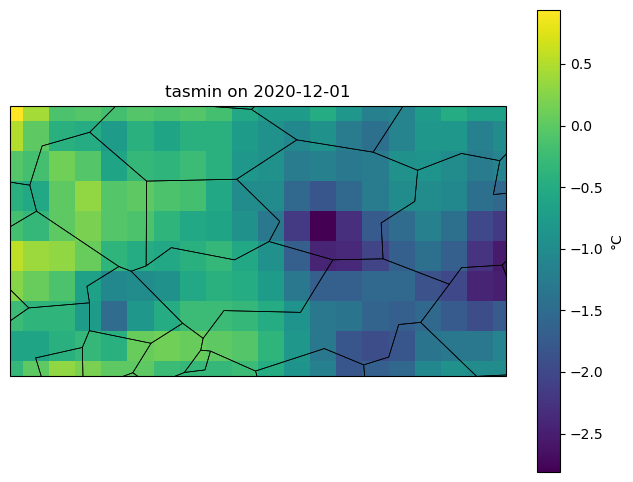

In [34]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from gisco_geodata import NUTS
# Open the NetCDF file
file_path = "mswx_surface_LAT50-51_LON8-10_20201201_20201231.nc"
ds = xr.open_dataset(file_path)
# print(ds)  # check variable names and dimensions

# Select variable and timestep
var_name='tasmin'
data = ds[var_name].isel(time=0)  # first timestep

# Create plot with curvilinear coordinates
fig, ax = plt.subplots(figsize=(8,6), subplot_kw={'projection': ccrs.PlateCarree()})

lat = ds["lat"].values
lon = ds["lon"].values
lat_min, lat_max = lat.min(), lat.max()
lon_min, lon_max = lon.min(), lon.max()

# pcolormesh with 2D lat/lon coordinates
im = ax.pcolormesh(
    lon,  # 2D lon
    lat,  # 2D lat
    data,
    cmap='viridis',
    transform=ccrs.PlateCarree()
)
nuts = NUTS()
nuts3 = nuts.get(nuts_level="LEVL_3", spatial_type="RG")
nuts3.plot(ax=ax, edgecolor="black", facecolor="none", linewidth=0.5, transform=ccrs.PlateCarree())
# Add coastlines and borders
ax.coastlines(resolution='10m')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_title(f"{var_name} on {str(data['time'].values)[:10]}")
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
# Add colorbar
fig.colorbar(im, ax=ax, orientation='vertical', label=str(data.attrs.get('units', '')))

plt.show()


In [22]:
import climdata
hyras = climdata.extract_data(
    overrides=[
            "dataset=hyras",
            "variables=['tasmin']",
            "table_id=day",
            "data_dir=./data",
            f"time_range.start_date=2020-12-01",
            f"time_range.end_date=2020-12-31",
            "bounds.custom={lat_min:50,lat_max:51,lon_min:8,lon_max:10}",
            "region=custom",
    ]
)

../../examples/conf
⬇️  Checking: https://opendata.dwd.de/climate_environment/CDC/grids_germany/daily/hyras_de/air_temperature_min/tasmin_hyras_1_2020_v6-0_de.nc
✔️  Exists locally: ./data/hyras/TASMIN/tasmin_hyras_1_2020_v6-0_de.nc
📦 Extracted curvilinear box with shape: FrozenMappingWarningOnValuesAccess({'time': 366, 'bnds': 2, 'x': 145, 'y': 110})
✅ Saved output to hyras_surface_LAT50-51_LON8-10_20201201_20201231.nc


<xarray.Dataset> Size: 47MB
Dimensions:  (time: 366, y: 110, x: 145)
Coordinates:
  * time     (time) datetime64[ns] 3kB 2020-01-01T12:00:00 ... 2020-12-31T12:...
    lon      (y, x) float64 128kB ...
    lat      (y, x) float64 128kB ...
  * x        (x) float32 580B 4.178e+06 4.178e+06 ... 4.32e+06 4.322e+06
  * y        (y) float32 440B 2.99e+06 2.99e+06 ... 3.098e+06 3.098e+06
Data variables:
    tasmin   (time, y, x) float64 47MB ...
Attributes: (12/21)
    source:                 surface observations
    institution:            Deutscher Wetterdienst (DWD)
    Conventions:            CF-1.11
    title:                  gridded_temperature_dataset_(HYRAS-DE TASMIN)
    realization:            v6-0
    project_id:             HYRAS
    ...                     ...
    license:                The HYRAS data, produced by DWD, is licensed unde...
    ConventionsURL:         http://cfconventions.org/Data/cf-conventions/cf-c...
    realm:                  atmos
    product:              

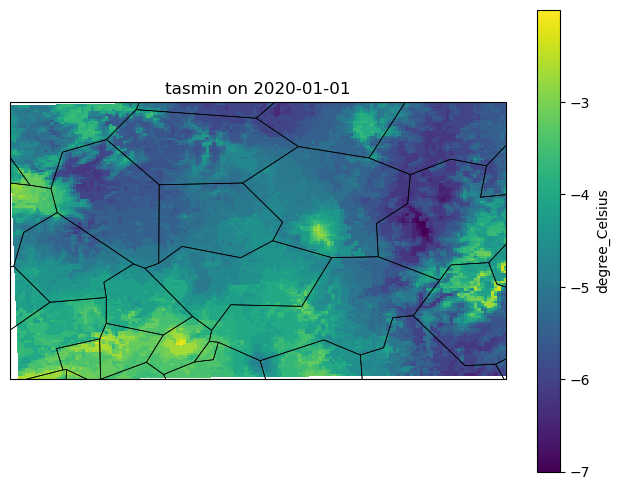

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from gisco_geodata import NUTS
# Open the NetCDF file
file_path = "hyras_surface_LAT50-51_LON8-10_20201201_20201231.nc"
ds = xr.open_dataset(file_path)
# print(ds)  # check variable names and dimensions

# Select variable and timestep
var_name = list(ds.data_vars)[0]  # replace with actual variable if needed
data = ds[var_name].isel(time=0)  # first timestep

# Create plot with curvilinear coordinates
fig, ax = plt.subplots(figsize=(8,6), subplot_kw={'projection': ccrs.PlateCarree()})

lat = ds["lat"].values
lon = ds["lon"].values
lat_min, lat_max = lat.min(), lat.max()
lon_min, lon_max = lon.min(), lon.max()

# pcolormesh with 2D lat/lon coordinates
im = ax.pcolormesh(
    lon,  # 2D lon
    lat,  # 2D lat
    data,
    cmap='viridis',
    transform=ccrs.PlateCarree()
)
nuts = NUTS()
nuts3 = nuts.get(nuts_level="LEVL_3", spatial_type="RG")
nuts3.plot(ax=ax, edgecolor="black", facecolor="none", linewidth=0.5, transform=ccrs.PlateCarree())
# Add coastlines and borders
ax.coastlines(resolution='10m')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_title(f"{var_name} on {str(data['time'].values)[:10]}")
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
# Add colorbar
fig.colorbar(im, ax=ax, orientation='vertical', label=str(data.attrs.get('units', '')))

plt.show()
